In [1]:
library(Seurat)
library(dplyr)
library(Matrix)
library(patchwork)
library(ggplot2)

pbmc.data<-Read10X(data.dir="/home/liusong/scRNA/endometriosis/V2data/aggregating/21samples/outs/count/filtered_feature_bc_matrix")
#remove ribsome genes#
rb.genes<-rownames(pbmc.data)[grep("^RP[SL]",rownames(pbmc.data))]
pbmc.data<-pbmc.data[!(rownames(pbmc.data) %in% rb.genes),]

pbmc <- CreateSeuratObject(count = pbmc.data, project = "10X_PBMC")
pbmc@meta.data$sampleID<-sub("^.................","",rownames(pbmc@meta.data)) #sub
pbmc@meta.data$fourgroup <- factor(pbmc@meta.data$sampleID, levels = 1:21, labels = rep(c("PEU", "SEU", "POEM", "SOEM", "POEM", "SOEM"), times = c(6, 7, 2, 4, 1, 1)))

EUstromals<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/EUstroma15000cells/obs.csv",header=TRUE)
ECstromals<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/ECstroma/obs.csv",header=TRUE)
head(pbmc@meta.data)
stromal<-subset(pbmc,cells=c(as.character(EUstromals$X),as.character(ECstromals$X)))


Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following object is masked from 'package:base':

    intersect



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


,orig.ident,nCount_RNA,nFeature_RNA,sampleID,fourgroup
,<fct>,<dbl>,<int>,<chr>,<fct>
AAACCTGAGAAACGAG-1,10X_PBMC,20006,5601,1,PEU
AAACCTGAGGCAGGTT-1,10X_PBMC,7546,2849,1,PEU
AAACCTGAGGTCATCT-1,10X_PBMC,10273,3541,1,PEU
AAACCTGAGTGTTAGA-1,10X_PBMC,4108,1953,1,PEU
AAACCTGCAACAACCT-1,10X_PBMC,5373,2300,1,PEU
AAACCTGGTAGCCTCG-1,10X_PBMC,6897,2784,1,PEU


Normalizing layer: counts

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"CombinePlots is being deprecated. Plots should now be combined using the patchwork system."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Requested variables to regress not in object: percent.mt"
Regressing out nCount_RNA

Centering and scaling data matrix



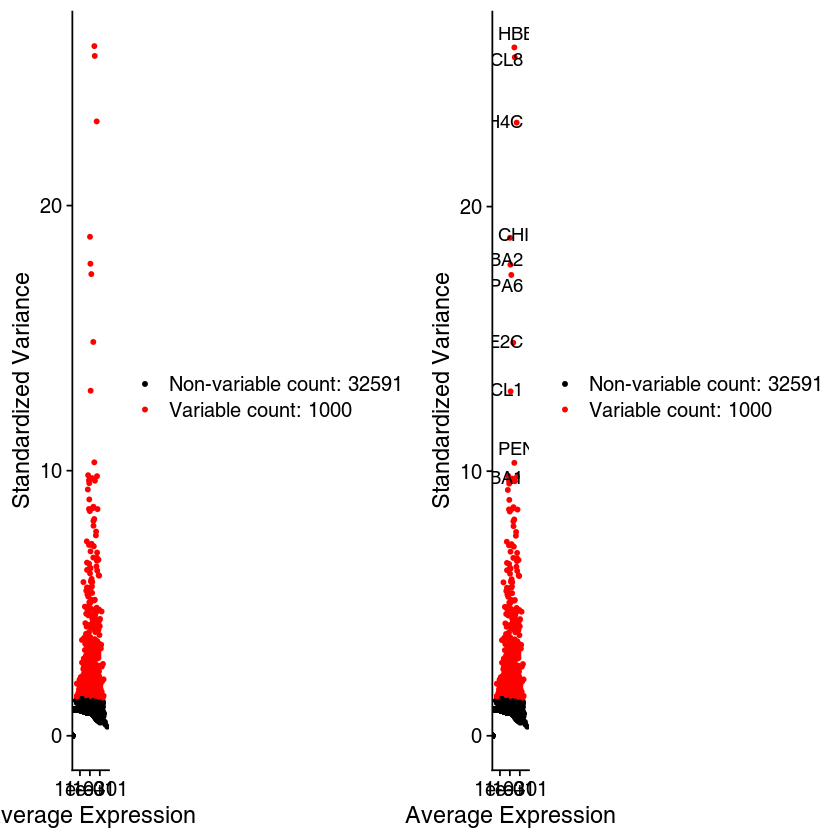

In [2]:
stromal <- NormalizeData(object = stromal, normalization.method = "LogNormalize", scale.factor = 10000)
stromal <- FindVariableFeatures(object = stromal,selection.method = "vst", nfeatures = 1000)
top10 <- head(VariableFeatures(stromal), 10)

plot1 <- VariableFeaturePlot(stromal)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))

stromal <- ScaleData(stromal,vars.to.regress = c("nCount_RNA", "percent.mt"))

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,MMP11,0,5.751132,0.973,0.203,0,PEU,MMP11
2,PAMR1,0,3.782878,0.830,0.148,0,PEU,PAMR1
3,NREP,0,3.220598,0.895,0.249,0,PEU,NREP
4,CRABP2,0,2.966284,0.952,0.311,0,PEU,CRABP2
5,RBP7,0,3.603801,0.698,0.103,0,PEU,RBP7
6,MFAP2,0,2.777300,0.760,0.176,0,PEU,MFAP2


$PEU
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04798 0.47026 0.55230 0.54576 0.62916 0.95947 

$SEU
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.49776 -0.26318 -0.18921 -0.17234 -0.09594  0.34463 

$POEM
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.11952  0.06859  0.17744  0.17094  0.27508  0.48342 

$SOEM
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.36574 -0.19307 -0.11752 -0.10574 -0.04122  0.22718 



	Welch Two Sample t-test

data:  stromal@meta.data$proscore1[stromal@meta.data$fourgroup == "PEU"] and stromal@meta.data$proscore1[stromal@meta.data$fourgroup == "SEU"]
t = 360.42, df = 14944, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7141956 0.7220063
sample estimates:
 mean of x  mean of y 
 0.5457619 -0.1723391 



	Welch Two Sample t-test

data:  stromal@meta.data$proscore1[stromal@meta.data$fourgroup == "POEM"] and stromal@meta.data$proscore1[stromal@meta.data$fourgroup == "SOEM"]
t = 17.235, df = 114.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2448801 0.3084799
sample estimates:
mean of x mean of y 
 0.170939 -0.105741 


$PEU
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.45048 -0.21945 -0.15338 -0.14234 -0.07694  0.44016 

$SEU
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.03755  0.55025  0.65773  0.64345  0.74971  1.16750 

$POEM
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01302 0.13873 0.20189 0.22497 0.31017 0.56909 

$SOEM
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.03143  0.44553  0.56138  0.54777  0.66071  0.89778 



	Welch Two Sample t-test

data:  stromal@meta.data$secscore1[stromal@meta.data$fourgroup == "PEU"] and stromal@meta.data$secscore1[stromal@meta.data$fourgroup == "SEU"]
t = -358.19, df = 12989, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7900877 -0.7814874
sample estimates:
 mean of x  mean of y 
-0.1423391  0.6434484 



	Welch Two Sample t-test

data:  stromal@meta.data$secscore1[stromal@meta.data$fourgroup == "POEM"] and stromal@meta.data$secscore1[stromal@meta.data$fourgroup == "SOEM"]
t = -21.732, df = 152.72, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3521516 -0.2934593
sample estimates:
mean of x mean of y 
0.2249658 0.5477712 


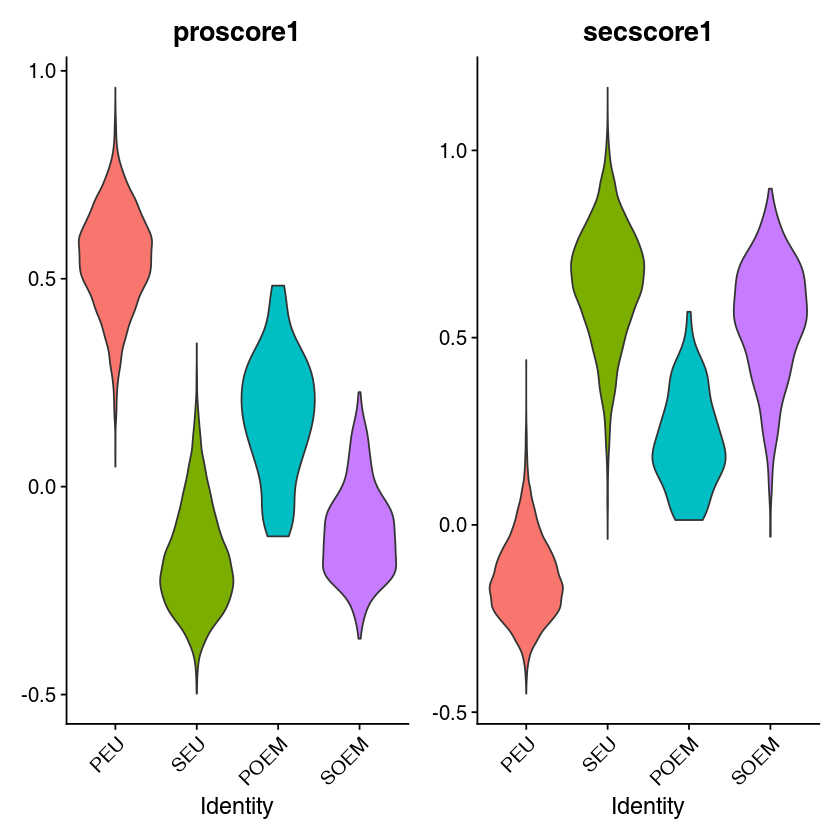

In [9]:
Menstrual.gene<-read.csv(file="/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/R_reanalyse/EUstroma/13EU_Menstrual_makers_FC1.csv")
head(Menstrual.gene)

progene<-list(Menstrual.gene$gene[Menstrual.gene$cluster=="PEU"])
secgene<-list(Menstrual.gene$gene[Menstrual.gene$cluster=="SEU"])

stromal<-AddModuleScore(stromal,features=progene,ctrl=100,name="proscore")
stromal<-AddModuleScore(stromal,features=secgene,ctrl=100,name="secscore")
VlnPlot(stromal,features=c("proscore1","secscore1"),group.by="fourgroup",pt.size=0)

tapply(stromal@meta.data$proscore1,stromal@meta.data$fourgroup,summary)
t.test(stromal@meta.data$proscore1[stromal@meta.data$fourgroup=="PEU"],stromal@meta.data$proscore1[stromal@meta.data$fourgroup=="SEU"])
t.test(stromal@meta.data$proscore1[stromal@meta.data$fourgroup=="POEM"],stromal@meta.data$proscore1[stromal@meta.data$fourgroup=="SOEM"])

tapply(stromal@meta.data$secscore1,stromal@meta.data$fourgroup,summary)
t.test(stromal@meta.data$secscore1[stromal@meta.data$fourgroup=="PEU"],stromal@meta.data$secscore1[stromal@meta.data$fourgroup=="SEU"])
t.test(stromal@meta.data$secscore1[stromal@meta.data$fourgroup=="POEM"],stromal@meta.data$secscore1[stromal@meta.data$fourgroup=="SOEM"])

Calculating cluster PEU

Calculating cluster SEU

Calculating cluster POEM

Calculating cluster SOEM

Warning message in DoHeatmap(object = stromal, features = top20$gene):
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: ZBTB16"
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


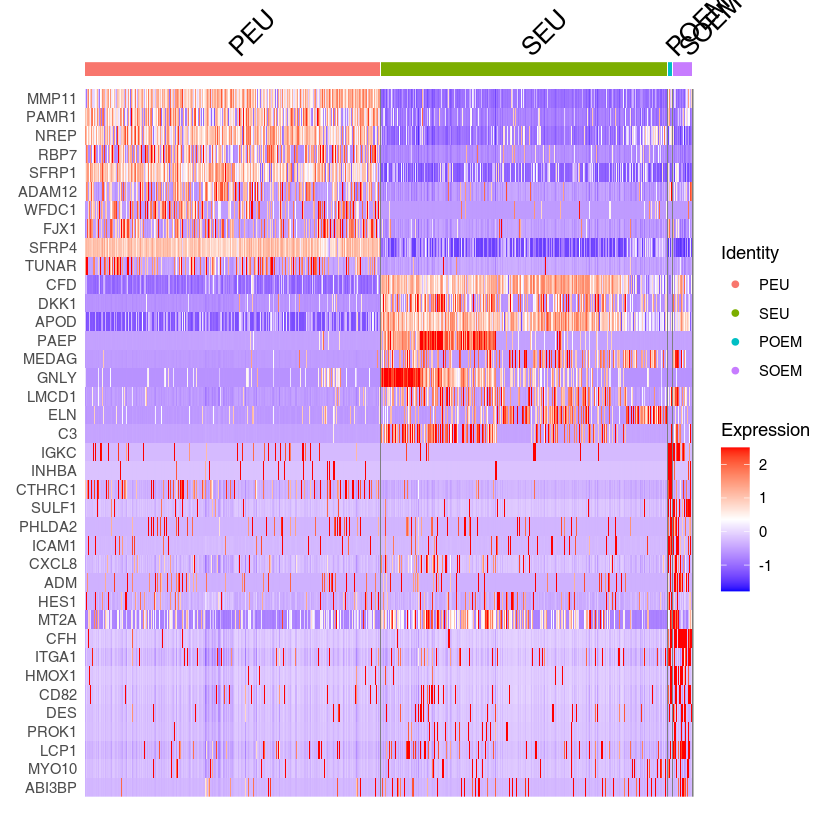

In [14]:
Idents(stromal)<-"fourgroup"
stromal.markers <- FindAllMarkers(object = stromal, only.pos = TRUE, min.pct = 0.4, thresh.use =1)
markers<-stromal.markers[stromal.markers$avg_log2FC>1 & stromal.markers$p_val_adj<0.05,]
write.csv(markers,file="EnS_fourgroup_markersFC1.csv")
top20 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
DoHeatmap(object = stromal, features = top20$gene)+scale_fill_gradientn(colors=c("blue","white","red"))


[1] 42

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MAP"         
[16] "OMIM"         "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"        
[21] "PMID"         "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIPROT"

'select()' returned 1:1 mapping between keys and columns



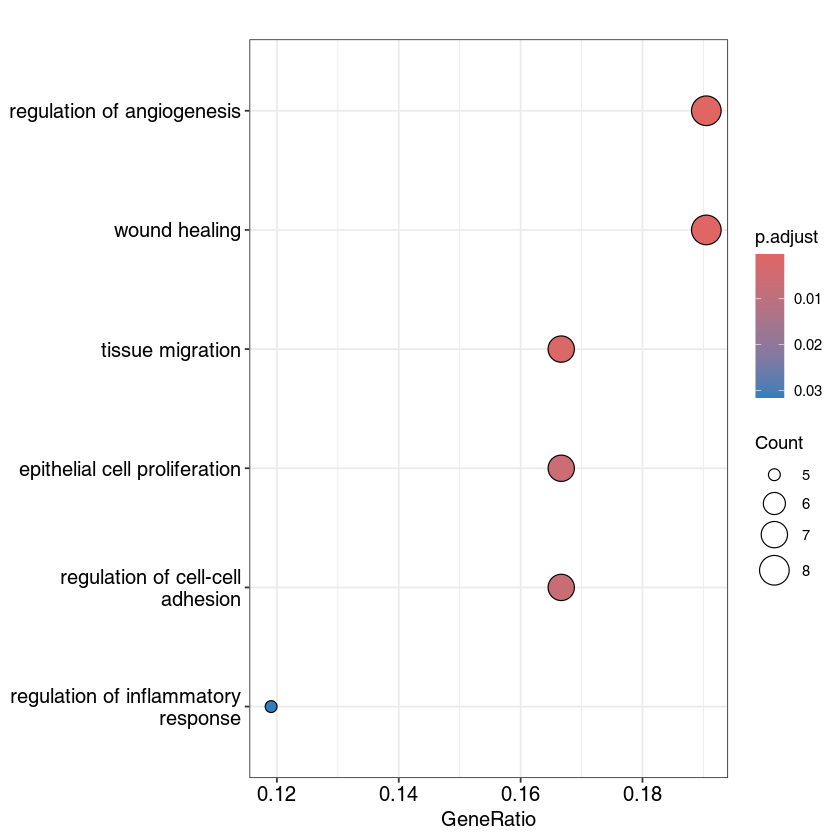

In [17]:
Upgenes<-intersect(markers$gene[markers$cluster=="POEM"],markers$gene[markers$cluster=="SOEM"]) #genes overexpressed in whole menstrual cycle
length(Upgenes)
library("clusterProfiler")
idType(OrgDb = "org.Hs.eg.db")
mygeneid<-bitr(Upgenes,fromType="SYMBOL",toType="ENTREZID",OrgDb="org.Hs.eg.db")
y2<-enrichGO(mygeneid$ENTREZID,OrgDb="org.Hs.eg.db",ont="BP")
dotplot(y2,showCategory=c("regulation of angiogenesis","wound healing","epithelial cell proliferation","tissue migration","regulation of cell-cell adhesion","regulation of inflammatory response"))
